### Function for check if any bound box value is greater than 1 or less than 0


In [1]:
import pandas as pd
import pyproj
import math

In [2]:
import os
state = "punjab"
label_directory = f"../data/region_performace/{state}_0.25/labels"
label_files = [f for f in os.listdir(label_directory) if f.endswith('.txt')]
print(f"Number of label files: {len(label_files)}")

def check_bounding_box_values(label_directory, label_files):
    counter = 0
    for label_file in label_files:
        label_path = os.path.join(label_directory, label_file)
        counter=False
        with open(label_path, 'r') as file:
            for line in file:
                parts = line.strip().split()
                # print(parts)
                
                # Extract bounding box coordinates (skip the class label)
                coordinates = list(map(float, parts[1:]))
                # print(coordinates)

                for coord in coordinates:

                    if coord > 1:
                        print(f"Bounding box value {coord} in file {label_file} is greater than 1")
                        counter=True
        if counter:
            counter+=1
    print(f"Number of files with bounding box values greater than 1: {counter}")                


check_bounding_box_values(label_directory, label_files)


Number of label files: 377
Number of files with bounding box values greater than 1: False


In [3]:
txt_files = [f for f in os.listdir(label_directory) if f.endswith('.txt')]
print(f"Number of text files: {len(txt_files)}")
df=pd.DataFrame(columns=['id','class','height_of_box','width_of_box','area','raw_bb_box','bb_box','geometry'])
display(df)

Number of text files: 377


,id,class,height_of_box,width_of_box,area,raw_bb_box,bb_box,geometry


In [4]:
image_size=640
latlon_to_webmercator = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
resolution_per_pixel = 4.77

for txt_file in txt_files:
    file_path = os.path.join(label_directory, txt_file)
    with open(file_path,'r') as file:
        lines=file.readlines()
        for line in lines:
            parts=line.split()
            class_name=parts[0]
            x1,y1,x2,y2,x3,y3,x4,y4=map(float,parts[1:])
            raw_bb_box=[x1,y1,x2,y2,x3,y3,x4,y4]

            x1=x1*image_size
            x2=x2*image_size
            x3=x3*image_size
            x4=x4*image_size
            y1=y1*image_size
            y2=y2*image_size
            y3=y3*image_size
            y4=y4*image_size

            lat1,lon1=latlon_to_webmercator.transform(y1,x1)
            lat2,lon2=latlon_to_webmercator.transform(y2,x2)
            lat3,lon3=latlon_to_webmercator.transform(y3,x3)
            lat4,lon4=latlon_to_webmercator.transform(y4,x4)

            width_pixels=math.sqrt((x2-x1)**2+(y2-y1)**2)
            height_pixels=math.sqrt((x4-x1)**2+(y4-y1)**2)
            width_meters=width_pixels*resolution_per_pixel
            height_meters=height_pixels*resolution_per_pixel

            # width = ((lat1 - lat2)**2 + (lon1 - lon2)**2)**0.5
            # height = ((lat1 - lat4)**2 + (lon1 - lon4)**2)**0.5


            area=width_meters*height_meters

            bb_box=[x1,y1,x2,y2,x3,y3,x4,y4]
            geometry=[(lat1,lon1),(lat2,lon2),(lat3,lon3),(lat4,lon4)]
            raw_data={'id':txt_file,
                          'class':class_name,
                          'height_of_box':height_meters,
                          'width_of_box':width_meters,
                          'area':area,
                          'raw_bb_box':raw_bb_box,
                          'bb_box':bb_box,
                        'geometry': {'type': 'Polygon', 'coordinates': [[(x1, y1), (x2, y2), (x3, y3), (x4, y4)]]}  
                        }
            row_df = pd.DataFrame([raw_data])
            df = pd.concat([df, row_df], ignore_index=True)



/tmp/ipykernel_158463/4015019140.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, row_df], ignore_index=True)


In [5]:
display(df.head(10))


,id,class,height_of_box,width_of_box,area,raw_bb_box,bb_box,geometry
0,8357627_3742966.txt,2,104.693979,52.972821,5545.935448,"[0.97078, 0.635022, 0.988132, 0.634937, 0.9879...","[621.2991999999999, 406.41408, 632.40448, 406....","{'type': 'Polygon', 'coordinates': [[(621.2991..."
1,8396151_3495310.txt,2,116.029090,56.755173,6585.251057,"[0.113764, 0.544476, 0.113974, 0.563066, 0.151...","[72.80896, 348.46464, 72.94336, 360.36224, 97....","{'type': 'Polygon', 'coordinates': [[(72.80896..."
2,8343868_3522827.txt,2,127.911876,65.017837,8316.553553,"[0.963761, 0.802034, 0.964655, 0.780755, 0.922...","[616.80704, 513.3017600000001, 617.37920000000...","{'type': 'Polygon', 'coordinates': [[(616.8070..."
3,8343868_3522827.txt,2,122.412613,71.873120,8798.176440,"[0.964102, 0.771984, 0.96469, 0.748448, 0.9246...","[617.0252800000001, 494.06976, 617.4016, 479.0...","{'type': 'Polygon', 'coordinates': [[(617.0252..."
4,8343868_3522827.txt,2,113.623939,59.663901,6779.247421,"[0.140258, 0.449537, 0.159527, 0.452804, 0.165...","[89.76512, 287.70368, 102.09728, 289.79456, 10...","{'type': 'Polygon', 'coordinates': [[(89.76512..."
5,8544744_3577862.txt,2,118.294901,69.429884,8213.201265,"[0.191128, 0.290899, 0.212917, 0.297417, 0.224...","[122.32191999999999, 186.17536, 136.26688, 190...","{'type': 'Polygon', 'coordinates': [[(122.3219..."
6,8437427_3588868.txt,2,125.982444,63.627820,8015.988199,"[0.775447, 0.953104, 0.796286, 0.953483, 0.797...","[496.28607999999997, 609.9865599999999, 509.62...","{'type': 'Polygon', 'coordinates': [[(496.2860..."
7,8343868_3674172.txt,2,128.672903,76.650572,9862.851588,"[0.312055, 0.742988, 0.337162, 0.743242, 0.337...","[199.7152, 475.51232, 215.78368, 475.67488, 21...","{'type': 'Polygon', 'coordinates': [[(199.7152..."
8,8343868_3674172.txt,2,109.858122,66.599922,7316.542339,"[0.360405, 0.719082, 0.382221, 0.719105, 0.382...","[230.6592, 460.21248, 244.62143999999998, 460....","{'type': 'Polygon', 'coordinates': [[(230.6592..."
9,8393399_3773235.txt,2,110.774355,57.039484,6318.512098,"[0.60687, 0.41913, 0.621364, 0.430921, 0.64426...","[388.3968, 268.2432, 397.67296, 275.78944, 412...","{'type': 'Polygon', 'coordinates': [[(388.3968..."


In [6]:
csv_directory = f"../result_csv/{state}_label_stats.csv"
df.to_csv(csv_directory, index=False)


In [7]:
#find the mean of the area of the bounding box
mean_area=df['area'].mean()
print(f"Mean area of bounding box {state}: {mean_area:.2f} meter square pixels")

Mean area of bounding box punjab: 7713.53 meter square pixels


In [55]:
state = "bihar"
csv_directory = f"../result_csv/{state}_label_stats.csv"


In [56]:
df=pd.read_csv(csv_directory)
overall_df=pd.DataFrame(columns=['state','mean_area','mean_height','mean_width','class','count','class_wise_mean','class_mean_height','class_mean_width'])
mean_area=df['area'].mean()
class_count=df['class'].value_counts()
class_names=class_count.index.tolist()
print(class_names)
mean_height=df['height_of_box'].mean()
mean_width=df['width_of_box'].mean()
print(mean_height)
print(mean_width)
class_wise_mean= df.groupby('class')['area'].mean()
print(class_wise_mean)
class_wise_mean_height= df.groupby('class')['height_of_box'].mean()
print(class_wise_mean_height)
class_wise_mean_width= df.groupby('class')['width_of_box'].mean()
print(class_wise_mean_width)


[2, 1]
99.20171287373917
49.99018007195848
class
1    4119.699249
2    5195.991060
Name: area, dtype: float64
class
1     92.182198
2    100.551855
Name: height_of_box, dtype: float64
class
1    44.158521
2    51.111848
Name: width_of_box, dtype: float64


In [57]:
class_count = df['class'].value_counts()
class_wise_mean = df.groupby('class')['area'].mean()
class_wise_mean_height = df.groupby('class')['height_of_box'].mean()
class_wise_mean_width = df.groupby('class')['width_of_box'].mean()

rows = []

for class_name in class_count.index:
    rows.append({
        'state': state,
        'mean_area': mean_area,
        'mean_height': mean_height,
        'mean_width': mean_width,
        'class': class_name,
        'count': class_count[class_name],
        'class_wise_mean': class_wise_mean[class_name],
        'class_mean_height': class_wise_mean_height[class_name],
        'class_mean_width': class_wise_mean_width[class_name]
    })

overall_df = pd.DataFrame(rows)

display(overall_df)

,state,mean_area,mean_height,mean_width,class,count,class_wise_mean,class_mean_height,class_mean_width
0,bihar,5022.370264,99.201713,49.99018,2,1149,5195.991060,100.551855,51.111848
1,bihar,5022.370264,99.201713,49.99018,1,221,4119.699249,92.182198,44.158521


In [27]:
# overall_df.to_csv(f"../result_csv/overall_label_stats.csv", index=False)
overall_df_path='../result_csv/overall_label_stats.csv'

In [59]:
overall_df_path='../result_csv/overall_label_stats.csv'

if not os.path.exists(overall_df_path):
    overall_df=overall_df
    overall_df.to_csv(overall_df_path,index=False)
else:
    existing_df=pd.read_csv(overall_df_path)
    overall_df=pd.concat([existing_df,overall_df],ignore_index=True)
    overall_df.to_csv(overall_df_path,index=False)



In [ ]:
# display(overall_df)

NameError: name 'overall_df' is not defined

In [29]:
data=pd.read_csv(overall_df_path)
bihar_mean_area=data[data['state']=='bihar']['mean_area'].mean()
print(bihar_mean_area)
data['mean_area_diff_from_bihar'] = data['mean_area'] - bihar_mean_area
display(data)

5022.370264391421


,state,mean_area,mean_height,mean_width,class,count,class_wise_mean,class_mean_height,class_mean_width,mean_area_diff_from_bihar,distance_from_bihar,mAP
0,punjab,7713.526874,121.219618,62.712344,2,440,7647.242937,119.604007,62.916265,2691.156609,1191.342548,0.373844
1,punjab,7713.526874,121.219618,62.712344,1,73,8113.046494,130.957542,61.483233,2691.156609,1191.342548,0.373844
2,haryana,8747.422097,131.416346,66.010377,2,550,8778.396530,131.323739,66.267006,3725.051832,1019.284241,0.410338
3,haryana,8747.422097,131.416346,66.010377,1,27,8116.461417,133.302788,60.782744,3725.051832,1019.284241,0.410338
4,west_bengal,4418.333578,94.096657,46.422177,2,397,4402.677307,93.445766,46.607139,-604.036687,354.395990,0.434204
5,west_bengal,4418.333578,94.096657,46.422177,1,168,4455.330837,95.634775,45.985094,-604.036687,354.395990,0.434204
6,uttar_pradesh,6591.397329,93.488704,78.485516,1,1908,6511.638075,92.010019,80.990840,1569.027065,482.201235,0.472958
7,uttar_pradesh,6591.397329,93.488704,78.485516,2,1352,6615.662147,96.966179,74.114001,1569.027065,482.201235,0.472958
8,uttar_pradesh,6591.397329,93.488704,78.485516,0,200,7188.270450,84.087619,84.136169,1569.027065,482.201235,0.472958
9,bihar,5022.370264,99.201713,49.990180,2,1149,5195.991060,100.551855,51.111848,0.000000,0.000000,0.811288


In [30]:
distance_dict = {
    'west_bengal': 354.3959902915622,
    'uttar_pradesh': 482.2012348652302,
    'haryana': 1019.2842410866616,
    'punjab': 1191.3425476426733,
    'bihar': 0

}
data['distance_from_bihar'] = data['state'].apply(lambda x: distance_dict[x])
display(data)

,state,mean_area,mean_height,mean_width,class,count,class_wise_mean,class_mean_height,class_mean_width,mean_area_diff_from_bihar,distance_from_bihar,mAP
0,punjab,7713.526874,121.219618,62.712344,2,440,7647.242937,119.604007,62.916265,2691.156609,1191.342548,0.373844
1,punjab,7713.526874,121.219618,62.712344,1,73,8113.046494,130.957542,61.483233,2691.156609,1191.342548,0.373844
2,haryana,8747.422097,131.416346,66.010377,2,550,8778.396530,131.323739,66.267006,3725.051832,1019.284241,0.410338
3,haryana,8747.422097,131.416346,66.010377,1,27,8116.461417,133.302788,60.782744,3725.051832,1019.284241,0.410338
4,west_bengal,4418.333578,94.096657,46.422177,2,397,4402.677307,93.445766,46.607139,-604.036687,354.395990,0.434204
5,west_bengal,4418.333578,94.096657,46.422177,1,168,4455.330837,95.634775,45.985094,-604.036687,354.395990,0.434204
6,uttar_pradesh,6591.397329,93.488704,78.485516,1,1908,6511.638075,92.010019,80.990840,1569.027065,482.201235,0.472958
7,uttar_pradesh,6591.397329,93.488704,78.485516,2,1352,6615.662147,96.966179,74.114001,1569.027065,482.201235,0.472958
8,uttar_pradesh,6591.397329,93.488704,78.485516,0,200,7188.270450,84.087619,84.136169,1569.027065,482.201235,0.472958
9,bihar,5022.370264,99.201713,49.990180,2,1149,5195.991060,100.551855,51.111848,0.000000,0.000000,0.811288


In [32]:
mAP = {
    'west_bengal': 0.434204,
    'uttar_pradesh': 0.472958,
    'haryana': 0.410338,
    'punjab': 0.373844,
    'bihar': 0.811288

}
data['mAP'] = data['state'].apply(lambda x: mAP[x])
display(data.style.background_gradient(cmap='viridis', subset=['mean_area','mean_area_diff_from_bihar', 'distance_from_bihar', 'mAP']))

,state,mean_area,mean_height,mean_width,class,count,class_wise_mean,class_mean_height,class_mean_width,mean_area_diff_from_bihar,distance_from_bihar,mAP
0,punjab,7713.526874,121.219618,62.712344,2,440,7647.242937,119.604007,62.916265,2691.156609,1191.342548,0.373844
1,punjab,7713.526874,121.219618,62.712344,1,73,8113.046494,130.957542,61.483233,2691.156609,1191.342548,0.373844
2,haryana,8747.422097,131.416346,66.010377,2,550,8778.396530,131.323739,66.267006,3725.051832,1019.284241,0.410338
3,haryana,8747.422097,131.416346,66.010377,1,27,8116.461417,133.302788,60.782744,3725.051832,1019.284241,0.410338
4,west_bengal,4418.333578,94.096657,46.422177,2,397,4402.677307,93.445766,46.607139,-604.036687,354.395990,0.434204
5,west_bengal,4418.333578,94.096657,46.422177,1,168,4455.330837,95.634775,45.985094,-604.036687,354.395990,0.434204
6,uttar_pradesh,6591.397329,93.488704,78.485516,1,1908,6511.638075,92.010019,80.990840,1569.027065,482.201235,0.472958
7,uttar_pradesh,6591.397329,93.488704,78.485516,2,1352,6615.662147,96.966179,74.114001,1569.027065,482.201235,0.472958
8,uttar_pradesh,6591.397329,93.488704,78.485516,0,200,7188.270450,84.087619,84.136169,1569.027065,482.201235,0.472958
9,bihar,5022.370264,99.201713,49.990180,2,1149,5195.991060,100.551855,51.111848,0.000000,0.000000,0.811288


In [33]:
data.to_csv(overall_df_path, index=False)

In [34]:
#make data data frame with only state and mean_area_diff_from_bihar and mAP
data_hypothesis=data[['state','mean_area_diff_from_bihar','mAP']]
display(data_hypothesis)

,state,mean_area_diff_from_bihar,mAP
0,punjab,2691.156609,0.373844
1,punjab,2691.156609,0.373844
2,haryana,3725.051832,0.410338
3,haryana,3725.051832,0.410338
4,west_bengal,-604.036687,0.434204
5,west_bengal,-604.036687,0.434204
6,uttar_pradesh,1569.027065,0.472958
7,uttar_pradesh,1569.027065,0.472958
8,uttar_pradesh,1569.027065,0.472958
9,bihar,0.000000,0.811288


In [35]:
#drop the duplicate rows
data_hypothesis.drop_duplicates(inplace=True)
display(data_hypothesis)

/tmp/ipykernel_834170/1125470569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hypothesis.drop_duplicates(inplace=True)


,state,mean_area_diff_from_bihar,mAP
0,punjab,2691.156609,0.373844
2,haryana,3725.051832,0.410338
4,west_bengal,-604.036687,0.434204
6,uttar_pradesh,1569.027065,0.472958
9,bihar,0.000000,0.811288


In [37]:
#sort the rows based on mean_area_diff_from_bihar
data_hypothesis=data_hypothesis.sort_values(by='mean_area_diff_from_bihar')
display(data_hypothesis.style.background_gradient(cmap='viridis', subset=['mean_area_diff_from_bihar', 'mAP']))

,state,mean_area_diff_from_bihar,mAP
4,west_bengal,-604.036687,0.434204
9,bihar,0.000000,0.811288
6,uttar_pradesh,1569.027065,0.472958
0,punjab,2691.156609,0.373844
2,haryana,3725.051832,0.410338


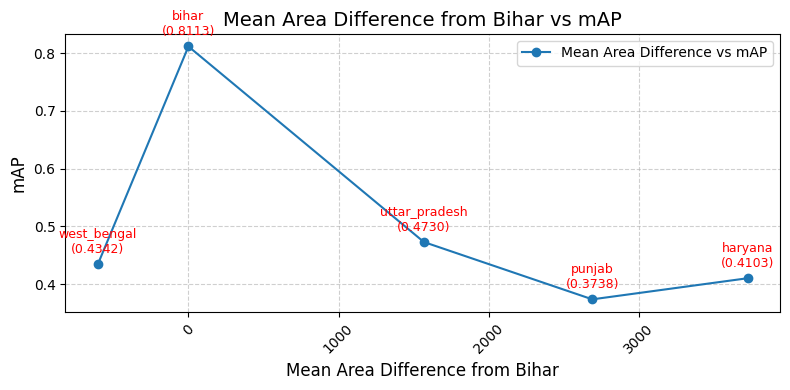

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(data_hypothesis['mean_area_diff_from_bihar'], data_hypothesis['mAP'], '-o', label='Mean Area Difference vs mAP')

plt.xticks(rotation=45)

# Annotate each point with the state name
for i in range(data_hypothesis.shape[0]):
    x = data_hypothesis['mean_area_diff_from_bihar'].iloc[i]
    y = data_hypothesis['mAP'].iloc[i]
    state = data_hypothesis['state'].iloc[i]
    plt.text(
        x=x, 
        y=y + 0.02,  
        s=f"{state}\n({y:.4f})", 
        fontsize=9,
        ha='center',
        color='red'
    )


plt.xlabel('Mean Area Difference from Bihar', fontsize=12)
plt.ylabel('mAP', fontsize=12)
plt.title('Mean Area Difference from Bihar vs mAP', fontsize=14)


plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

